In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Bayesian import BayesianLinearRegression, SklearnBayesianLinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

sns.set_theme()
sns.set_context("notebook")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [144]:
dtype_dict = {
    'Date': 'str',
    'FarmName_Pseudo': 'str',
    'SE_Number': 'str',
    'Age': 'Int64',
    'BreedName': 'str',
    'DailyYield': 'float',
    'PreviousDailyYield': 'float',
    'DailyYieldChange': 'float',
    'DaysInMilk': 'Int64',
    'YearSeason': 'str',
    'LactationNumber': 'Int64',
    'ExpectedYield': 'float',
    'NormalizedDailyYield': 'float',
    'NormalizedDailyYieldChange': 'float',
    'HeatStress': 'Int64',
    'Temp15Threshold': 'Int64',
    'HW': 'Int64',
    'cum_HW': 'Int64',
    'MeanTemperature': 'float',
    'MeanTHI_adj': 'float'
}

milk_data = pd.read_csv('../Data/MergedData/HeatApproachYieldData.csv', dtype=dtype_dict)
milk_data['Date'] = pd.to_datetime(milk_data['Date'], format='%Y-%m-%d')
milk_data.head(-5)

,Date,FarmName_Pseudo,SE_Number,Age,BreedName,LactationNumber,DaysInMilk,YearSeason,DailyYield,PreviousDailyYield,...,NormalizedDailyYield,NormalizedDailyYieldChange,HeatStress,Temp15Threshold,HW,cum_HW,MeanTemperature,MeanTHI_adj,HeatLoad,CumulativeHeatLoad
0,2022-01-01,a624fb9a,SE-064c0cec-1189,3095,02 SLB,7,191,2022-1,30.77,0.000000,...,0.856748,0.000000,0,0,0,0,-3.025000,28.012944,-34.487056,0.0
1,2022-01-02,a624fb9a,SE-064c0cec-1189,3096,02 SLB,7,192,2022-1,48.22,30.770000,...,1.103224,0.243718,0,0,0,0,-0.279167,32.898193,-29.601807,0.0
2,2022-01-03,a624fb9a,SE-064c0cec-1189,3097,02 SLB,7,193,2022-1,30.53,39.495000,...,1.023044,-0.083744,0,0,0,0,2.033333,36.760487,-25.739513,0.0
3,2022-01-04,a624fb9a,SE-064c0cec-1189,3098,02 SLB,7,194,2022-1,42.26,36.506667,...,1.066796,0.040438,0,0,0,0,0.066667,31.939524,-30.560476,0.0
4,2022-01-05,a624fb9a,SE-064c0cec-1189,3099,02 SLB,7,195,2022-1,38.49,37.945000,...,1.073339,0.003074,0,0,0,0,-3.700000,26.498206,-36.001794,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483097,2023-06-03,f454e660,SE-fcdf259d-0044-0,4150,41 Fjällko,10,347,2023-3,12.67,14.652000,...,1.030966,-0.045706,0,1,0,0,12.666667,53.132530,-9.367470,0.0
483098,2023-06-04,f454e660,SE-fcdf259d-0044-0,4151,41 Fjällko,10,348,2023-3,22.31,14.030000,...,1.108549,0.070579,0,1,0,0,13.079167,56.726870,-5.773130,0.0
483099,2023-06-05,f454e660,SE-fcdf259d-0044-0,4152,41 Fjällko,10,349,2023-3,12.84,14.984000,...,1.109278,-0.006853,0,1,0,0,14.237500,58.482418,-4.017582,0.0
483100,2023-06-06,f454e660,SE-fcdf259d-0044-0,4153,41 Fjällko,10,350,2023-3,9.47,14.892000,...,1.095617,-0.021300,0,1,0,0,15.345833,60.546358,-1.953642,0.0


In [145]:
# Check data types
milk_data.dtypes

Date                          datetime64[ns]
FarmName_Pseudo                       object
SE_Number                             object
Age                                    Int64
BreedName                             object
LactationNumber                        Int64
DaysInMilk                             Int64
YearSeason                            object
DailyYield                           float64
PreviousDailyYield                   float64
DailyYieldChange                     float64
ExpectedYield                        float64
NormalizedDailyYield                 float64
NormalizedDailyYieldChange           float64
HeatStress                             Int64
Temp15Threshold                        Int64
HW                                     Int64
cum_HW                                 Int64
MeanTemperature                      float64
MeanTHI_adj                          float64
HeatLoad                             float64
CumulativeHeatLoad                   float64
dtype: obj

In [146]:
# Check NaN values
milk_data.isnull().sum()

Date                          0
FarmName_Pseudo               0
SE_Number                     0
Age                           0
BreedName                     0
LactationNumber               0
DaysInMilk                    0
YearSeason                    0
DailyYield                    0
PreviousDailyYield            0
DailyYieldChange              0
ExpectedYield                 0
NormalizedDailyYield          0
NormalizedDailyYieldChange    0
HeatStress                    0
Temp15Threshold               0
HW                            0
cum_HW                        0
MeanTemperature               0
MeanTHI_adj                   0
HeatLoad                      0
CumulativeHeatLoad            0
dtype: int64

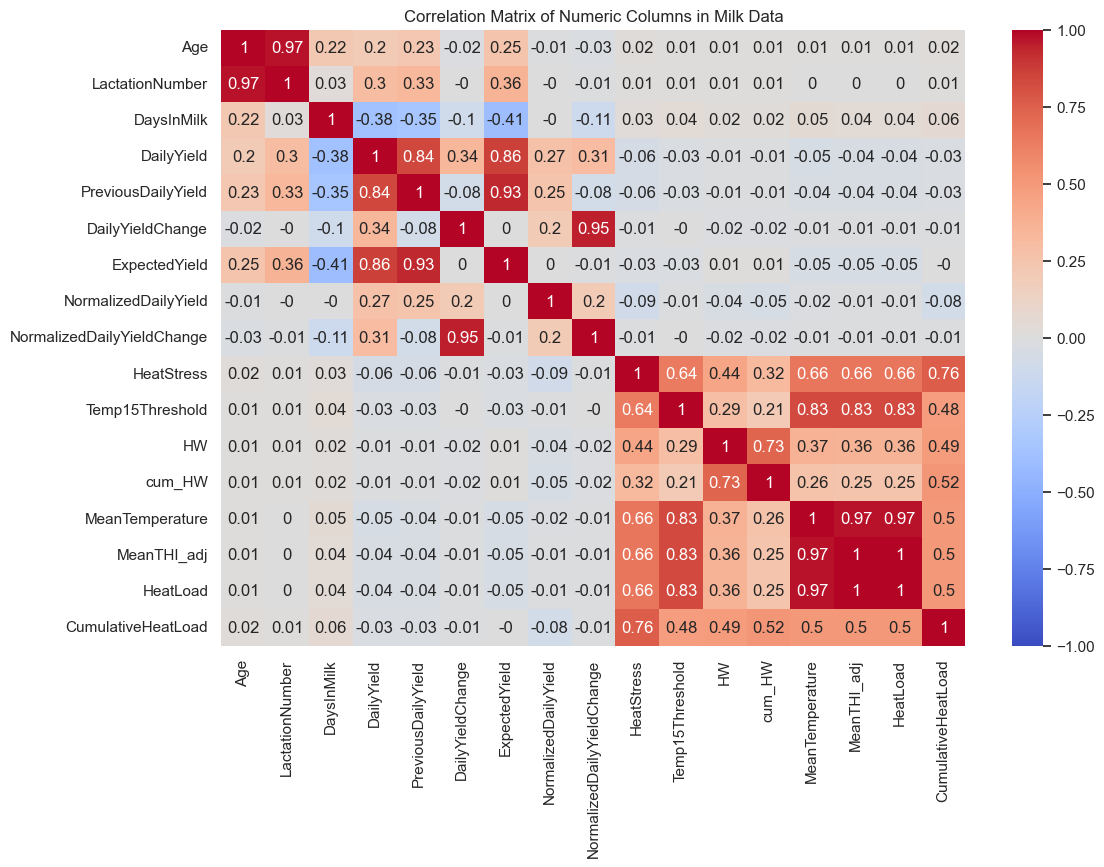

In [147]:
# Filter out only numeric columns
numeric_cols = milk_data.select_dtypes(include=['float64', 'int64']).columns
milk_data_numeric = milk_data[numeric_cols]

# Calculate the correlation matrix
corr_matrix = milk_data_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Columns in Milk Data')
plt.show()

In [148]:
# Output the correlation matrix here in the notebook with two decimals
corr_matrix.round(2)

,Age,LactationNumber,DaysInMilk,DailyYield,PreviousDailyYield,DailyYieldChange,ExpectedYield,NormalizedDailyYield,NormalizedDailyYieldChange,HeatStress,Temp15Threshold,HW,cum_HW,MeanTemperature,MeanTHI_adj,HeatLoad,CumulativeHeatLoad
Age,1.00,0.97,0.22,0.20,0.23,-0.02,0.25,-0.01,-0.03,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.02
LactationNumber,0.97,1.00,0.03,0.30,0.33,-0.00,0.36,-0.00,-0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.01
DaysInMilk,0.22,0.03,1.00,-0.38,-0.35,-0.10,-0.41,-0.00,-0.11,0.03,0.04,0.02,0.02,0.05,0.04,0.04,0.06
DailyYield,0.20,0.30,-0.38,1.00,0.84,0.34,0.86,0.27,0.31,-0.06,-0.03,-0.01,-0.01,-0.05,-0.04,-0.04,-0.03
PreviousDailyYield,0.23,0.33,-0.35,0.84,1.00,-0.08,0.93,0.25,-0.08,-0.06,-0.03,-0.01,-0.01,-0.04,-0.04,-0.04,-0.03
DailyYieldChange,-0.02,-0.00,-0.10,0.34,-0.08,1.00,0.00,0.20,0.95,-0.01,-0.00,-0.02,-0.02,-0.01,-0.01,-0.01,-0.01
ExpectedYield,0.25,0.36,-0.41,0.86,0.93,0.00,1.00,0.00,-0.01,-0.03,-0.03,0.01,0.01,-0.05,-0.05,-0.05,-0.00
NormalizedDailyYield,-0.01,-0.00,-0.00,0.27,0.25,0.20,0.00,1.00,0.20,-0.09,-0.01,-0.04,-0.05,-0.02,-0.01,-0.01,-0.08
NormalizedDailyYieldChange,-0.03,-0.01,-0.11,0.31,-0.08,0.95,-0.01,0.20,1.00,-0.01,-0.00,-0.02,-0.02,-0.01,-0.01,-0.01,-0.01
HeatStress,0.02,0.01,0.03,-0.06,-0.06,-0.01,-0.03,-0.09,-0.01,1.00,0.64,0.44,0.32,0.66,0.66,0.66,0.76


# Now we start modeling

**The aim is to find a quantitative factor for each farm which tells us approximately how much does heatstress affect the milk yield on that specific farm.**

## Farm a624fb9a

### Block 1: Model Training and Relative Change Calculation

In this block, we train a Bayesian linear regression model for each combination of features to determine the impact of heat stress on milk production. We calculate the relative change in normalized daily yield for each farm under heat stress and no heat stress conditions.

**Process:**
1. **Data Preparation**: Filter the dataset for the specific farm and split it based on the `HeatStress` condition into training and validation sets.
2. **Feature Scaling**: Scale the continuous features (MeanTemperature, MeanTHI_adj) in the training sets using `StandardScaler`.
3. **Model Training**: For each feature combination:
   - Define priors based on the mean and variance of the normalized daily yield and selected features from the training data.
   - Initialize and fit a Bayesian linear regression model on the training data.
   - Calculate the relative change in normalized daily yield for the offset (baseline) in percentage terms using the training data.
4. **Output**: Print the prior and posterior means and standard deviations for each feature combination and the relative change percentage.

This block helps identify how different features affect milk production under varying heat stress conditions using training data.

In [149]:
# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['FarmName_Pseudo', 'FarmHeatStressProduction'])

# Set subject type to 'farm'
subject_type = 'farm'

# Specify the farm ID for analysis
farm_id = 'a624fb9a'

# Filter data for the specific farm
farm_data = milk_data[milk_data['FarmName_Pseudo'] == farm_id]

# Check if NormalizedDailyYield is centered around 1
normalized_mean = farm_data['NormalizedDailyYield'].mean()
normalized_variance = farm_data['NormalizedDailyYield'].var()
print("Mean of NormalizedDailyYield:", normalized_mean)
print("Standard Deviation of NormalizedDailyYield:", farm_data['NormalizedDailyYield'].std())
print("Variance of NormalizedDailyYield:", normalized_variance)

# Define the target variable
target = 'NormalizedDailyYield'

# Split the data into train and validation sets
train_data, val_data = train_test_split(farm_data, test_size=0.3, random_state=42)

# Define the single feature
features = ['HeatStress']

# Function to fit and get the posterior mean for HeatStress
def fit_and_get_heatstress_posterior(farm_id, train_data, features):
    print(f"\nSelected features: {features}")

    # Calculate prior means for the features
    prior_mean_values = [train_data[feature].mean() for feature in features]
    prior_std_values = [train_data[feature].std() for feature in features]
    
    # Define priors
    prior_mean = np.array([normalized_mean] + prior_mean_values).reshape(-1, 1)
    prior_std = np.array([np.sqrt(normalized_variance)] + prior_std_values).reshape(-1, 1)
    prior_cov = np.eye(len(features) + 1) * 0.01  # Smaller value for stronger prior confidence
    beta = 1 / normalized_variance

    # Print prior means and standard deviations
    print(f"\nPrior Mean and Standard Deviation for each feature:\n")
    for feature, mean, std in zip(['Off-set'] + features, prior_mean.flatten(), prior_std.flatten()):
        print(f"{feature}: mean = {mean}, std_dev = {std}")

    # Initialize and fit the model
    model = BayesianLinearRegression(
        dataframe=train_data,
        subject_name=farm_id,
        selected_features=features,
        target=target,
        subject_type=subject_type,
        prior_mean=prior_mean,
        prior_cov=prior_cov,
        beta=beta
    )
    result = model.fit_model()

    # Print posterior mean and standard deviation for each feature
    print(f"\nPosterior Mean and Standard Deviation for each feature:\n")
    for feature, stats in result.items():
        print(f"{feature}: mean = {stats['mu']}, std_dev = {stats['sigma']}")

    # Extract the posterior mean for HeatStress
    heatstress_posterior_mean = result['HeatStress']['mu']

    return heatstress_posterior_mean

# Train the model with the HeatStress feature on the training set and print results
heatstress_posterior_mean = fit_and_get_heatstress_posterior(farm_id, train_data, features)

# Create a new DataFrame for the current farm's result
new_result = pd.DataFrame([{
    'FarmName_Pseudo': farm_id,
    'FarmHeatStressProduction': heatstress_posterior_mean
}])

# Check if results_df is empty before concatenation
if results_df.empty:
    results_df = new_result
else:
    results_df = pd.concat([results_df, new_result], ignore_index=True)

results_df

Mean of NormalizedDailyYield: 1.000214161560042
Standard Deviation of NormalizedDailyYield: 0.10190530213781133
Variance of NormalizedDailyYield: 0.010384690603798616

Selected features: ['HeatStress']

Prior Mean and Standard Deviation for each feature:

Off-set: mean = 1.000214161560042, std_dev = 0.10190530213781133
HeatStress: mean = 0.2129735118199943, std_dev = 0.40941393909631707

Posterior Mean and Standard Deviation for each feature:

Off-set: mean = 1.0111899068271255, std_dev = 0.0005520041977538688
HeatStress: mean = -0.052647136356534154, std_dev = 0.0011961280083123576


,FarmName_Pseudo,FarmHeatStressProduction
0,a624fb9a,-0.052647


# Now we do the same for the rest of the farms

## Farm 5c06d92d

In [150]:
# Specify the farm ID for analysis
farm_id = '5c06d92d'

# Filter data for the specific farm
farm_data = milk_data[milk_data['FarmName_Pseudo'] == farm_id]

# Check if NormalizedDailyYield is centered around 1
normalized_mean = farm_data['NormalizedDailyYield'].mean()
normalized_variance = farm_data['NormalizedDailyYield'].var()
print("Mean of NormalizedDailyYield:", normalized_mean)
print("Standard Deviation of NormalizedDailyYield:", farm_data['NormalizedDailyYield'].std())
print("Variance of NormalizedDailyYield:", normalized_variance)

# Define the target variable
target = 'NormalizedDailyYield'

# Split the data into train and validation sets
train_data, val_data = train_test_split(farm_data, test_size=0.3, random_state=42)

# Define the single feature
features = ['HeatStress']

# Function to fit and get the posterior mean for HeatStress
def fit_and_get_heatstress_posterior(farm_id, train_data, features):
    print(f"\nSelected features: {features}")

    # Calculate prior means for the features
    prior_mean_values = [train_data[feature].mean() for feature in features]
    prior_std_values = [train_data[feature].std() for feature in features]
    
    # Define priors
    prior_mean = np.array([normalized_mean] + prior_mean_values).reshape(-1, 1)
    prior_std = np.array([np.sqrt(normalized_variance)] + prior_std_values).reshape(-1, 1)
    prior_cov = np.eye(len(features) + 1) * 0.01  # Smaller value for stronger prior confidence
    beta = 1 / normalized_variance

    # Print prior means and standard deviations
    print(f"\nPrior Mean and Standard Deviation for each feature:\n")
    for feature, mean, std in zip(['Off-set'] + features, prior_mean.flatten(), prior_std.flatten()):
        print(f"{feature}: mean = {mean}, std_dev = {std}")

    # Initialize and fit the model
    model = BayesianLinearRegression(
        dataframe=train_data,
        subject_name=farm_id,
        selected_features=features,
        target=target,
        subject_type=subject_type,
        prior_mean=prior_mean,
        prior_cov=prior_cov,
        beta=beta
    )
    result = model.fit_model()

    # Print posterior mean and standard deviation for each feature
    print(f"\nPosterior Mean and Standard Deviation for each feature:\n")
    for feature, stats in result.items():
        print(f"{feature}: mean = {stats['mu']}, std_dev = {stats['sigma']}")

    # Extract the posterior mean for HeatStress
    heatstress_posterior_mean = result['HeatStress']['mu']

    return heatstress_posterior_mean

# Train the model with the HeatStress feature on the training set and print results
heatstress_posterior_mean = fit_and_get_heatstress_posterior(farm_id, train_data, features)

# Create a new DataFrame for the current farm's result
new_result = pd.DataFrame([{
    'FarmName_Pseudo': farm_id,
    'FarmHeatStressProduction': heatstress_posterior_mean
}])

# Check if results_df is empty before concatenation
if results_df.empty:
    results_df = new_result
else:
    results_df = pd.concat([results_df, new_result], ignore_index=True)

results_df

Mean of NormalizedDailyYield: 0.9998734816219872
Standard Deviation of NormalizedDailyYield: 0.11010619232060219
Variance of NormalizedDailyYield: 0.012123373587341436

Selected features: ['HeatStress']

Prior Mean and Standard Deviation for each feature:

Off-set: mean = 0.9998734816219872, std_dev = 0.11010619232060219
HeatStress: mean = 0.2578620541628735, std_dev = 0.4374592913419702

Posterior Mean and Standard Deviation for each feature:

Off-set: mean = 1.003822206783519, std_dev = 0.0003002110932141046
HeatStress: mean = -0.01446073445583404, std_dev = 0.0005911975137348727


,FarmName_Pseudo,FarmHeatStressProduction
0,a624fb9a,-0.052647
1,5c06d92d,-0.014461


## Farm 752efd72

In [151]:
# Specify the farm ID for analysis
farm_id = '752efd72'

# Filter data for the specific farm
farm_data = milk_data[milk_data['FarmName_Pseudo'] == farm_id]

# Check if NormalizedDailyYield is centered around 1
normalized_mean = farm_data['NormalizedDailyYield'].mean()
normalized_variance = farm_data['NormalizedDailyYield'].var()
print("Mean of NormalizedDailyYield:", normalized_mean)
print("Standard Deviation of NormalizedDailyYield:", farm_data['NormalizedDailyYield'].std())
print("Variance of NormalizedDailyYield:", normalized_variance)

# Define the target variable
target = 'NormalizedDailyYield'

# Split the data into train and validation sets
train_data, val_data = train_test_split(farm_data, test_size=0.3, random_state=42)

# Define the single feature
features = ['HeatStress']

# Function to fit and get the posterior mean for HeatStress
def fit_and_get_heatstress_posterior(farm_id, train_data, features):
    print(f"\nSelected features: {features}")

    # Calculate prior means for the features
    prior_mean_values = [train_data[feature].mean() for feature in features]
    prior_std_values = [train_data[feature].std() for feature in features]
    
    # Define priors
    prior_mean = np.array([normalized_mean] + prior_mean_values).reshape(-1, 1)
    prior_std = np.array([np.sqrt(normalized_variance)] + prior_std_values).reshape(-1, 1)
    prior_cov = np.eye(len(features) + 1) * 0.01  # Smaller value for stronger prior confidence
    beta = 1 / normalized_variance

    # Print prior means and standard deviations
    print(f"\nPrior Mean and Standard Deviation for each feature:\n")
    for feature, mean, std in zip(['Off-set'] + features, prior_mean.flatten(), prior_std.flatten()):
        print(f"{feature}: mean = {mean}, std_dev = {std}")

    # Initialize and fit the model
    model = BayesianLinearRegression(
        dataframe=train_data,
        subject_name=farm_id,
        selected_features=features,
        target=target,
        subject_type=subject_type,
        prior_mean=prior_mean,
        prior_cov=prior_cov,
        beta=beta
    )
    result = model.fit_model()

    # Print posterior mean and standard deviation for each feature
    print(f"\nPosterior Mean and Standard Deviation for each feature:\n")
    for feature, stats in result.items():
        print(f"{feature}: mean = {stats['mu']}, std_dev = {stats['sigma']}")

    # Extract the posterior mean for HeatStress
    heatstress_posterior_mean = result['HeatStress']['mu']

    return heatstress_posterior_mean

# Train the model with the HeatStress feature on the training set and print results
heatstress_posterior_mean = fit_and_get_heatstress_posterior(farm_id, train_data, features)

# Create a new DataFrame for the current farm's result
new_result = pd.DataFrame([{
    'FarmName_Pseudo': farm_id,
    'FarmHeatStressProduction': heatstress_posterior_mean
}])

# Check if results_df is empty before concatenation
if results_df.empty:
    results_df = new_result
else:
    results_df = pd.concat([results_df, new_result], ignore_index=True)

results_df

Mean of NormalizedDailyYield: 1.0000642245718283
Standard Deviation of NormalizedDailyYield: 0.0731526227092293
Variance of NormalizedDailyYield: 0.0053513062092388495

Selected features: ['HeatStress']

Prior Mean and Standard Deviation for each feature:

Off-set: mean = 1.0000642245718283, std_dev = 0.0731526227092293
HeatStress: mean = 0.23996855162774444, std_dev = 0.4270660559477356

Posterior Mean and Standard Deviation for each feature:

Off-set: mean = 1.0068048717661426, std_dev = 0.0002623082413588141
HeatStress: mean = -0.028041081824146472, std_dev = 0.0005354690958480621


,FarmName_Pseudo,FarmHeatStressProduction
0,a624fb9a,-0.052647
1,5c06d92d,-0.014461
2,752efd72,-0.028041


## Farm f454e660

In [152]:
# Specify the farm ID for analysis
farm_id = 'f454e660'

# Filter data for the specific farm
farm_data = milk_data[milk_data['FarmName_Pseudo'] == farm_id]

# Check if NormalizedDailyYield is centered around 1
normalized_mean = farm_data['NormalizedDailyYield'].mean()
normalized_variance = farm_data['NormalizedDailyYield'].var()
print("Mean of NormalizedDailyYield:", normalized_mean)
print("Standard Deviation of NormalizedDailyYield:", farm_data['NormalizedDailyYield'].std())
print("Variance of NormalizedDailyYield:", normalized_variance)

# Define the target variable
target = 'NormalizedDailyYield'

# Split the data into train and validation sets
train_data, val_data = train_test_split(farm_data, test_size=0.3, random_state=42)

# Define the single feature
features = ['HeatStress']

# Function to fit and get the posterior mean for HeatStress
def fit_and_get_heatstress_posterior(farm_id, train_data, features):
    print(f"\nSelected features: {features}")

    # Calculate prior means for the features
    prior_mean_values = [train_data[feature].mean() for feature in features]
    prior_std_values = [train_data[feature].std() for feature in features]
    
    # Define priors
    prior_mean = np.array([normalized_mean] + prior_mean_values).reshape(-1, 1)
    prior_std = np.array([np.sqrt(normalized_variance)] + prior_std_values).reshape(-1, 1)
    prior_cov = np.eye(len(features) + 1) * 0.01  # Smaller value for stronger prior confidence
    beta = 1 / normalized_variance

    # Print prior means and standard deviations
    print(f"\nPrior Mean and Standard Deviation for each feature:\n")
    for feature, mean, std in zip(['Off-set'] + features, prior_mean.flatten(), prior_std.flatten()):
        print(f"{feature}: mean = {mean}, std_dev = {std}")

    # Initialize and fit the model
    model = BayesianLinearRegression(
        dataframe=train_data,
        subject_name=farm_id,
        selected_features=features,
        target=target,
        subject_type=subject_type,
        prior_mean=prior_mean,
        prior_cov=prior_cov,
        beta=beta
    )
    result = model.fit_model()

    # Print posterior mean and standard deviation for each feature
    print(f"\nPosterior Mean and Standard Deviation for each feature:\n")
    for feature, stats in result.items():
        print(f"{feature}: mean = {stats['mu']}, std_dev = {stats['sigma']}")

    # Extract the posterior mean for HeatStress
    heatstress_posterior_mean = result['HeatStress']['mu']

    return heatstress_posterior_mean

# Train the model with the HeatStress feature on the training set and print results
heatstress_posterior_mean = fit_and_get_heatstress_posterior(farm_id, train_data, features)

# Create a new DataFrame for the current farm's result
new_result = pd.DataFrame([{
    'FarmName_Pseudo': farm_id,
    'FarmHeatStressProduction': heatstress_posterior_mean
}])

# Check if results_df is empty before concatenation
if results_df.empty:
    results_df = new_result
else:
    results_df = pd.concat([results_df, new_result], ignore_index=True)

results_df

Mean of NormalizedDailyYield: 0.9998738797329533
Standard Deviation of NormalizedDailyYield: 0.11483306817532685
Variance of NormalizedDailyYield: 0.013186633546559265

Selected features: ['HeatStress']

Prior Mean and Standard Deviation for each feature:

Off-set: mean = 0.9998738797329533, std_dev = 0.11483306817532685
HeatStress: mean = 0.22886156396794693, std_dev = 0.4201035544126959

Posterior Mean and Standard Deviation for each feature:

Off-set: mean = 0.9998098816021984, std_dev = 0.0005429150899251394
HeatStress: mean = 0.0016498712585209909, std_dev = 0.0011348639982422112


,FarmName_Pseudo,FarmHeatStressProduction
0,a624fb9a,-0.052647
1,5c06d92d,-0.014461
2,752efd72,-0.028041
3,f454e660,0.001650


In [153]:
# Save the new data to a new CSV file called 'FarmHeatData.csv' in same folder
milk_data.to_csv('../Data/MergedData/BLRHeatFarmYieldData.csv', index=False)

### Variables Explanation for `BLRHeatFarmYieldData.csv`

1. **Date**:
   - Description: The date when the milk yield was recorded.
   - Datatype: `datetime`
   - Format: `YYYY-MM-DD`
   - Example: `2022-01-01`

2. **FarmName_Pseudo**:
   - Description: A pseudo-identifier for the farm where the data was collected.
   - Datatype: `str`
   - Example: `a624fb9a`

3. **SE_Number**:
   - Description: A unique identifier for the cow, which has been formatted to include the farm and the animal number.
   - Datatype: `str`
   - Example: `SE-064c0cec-1189`

4. **Age**:
   - Description: The age of the cow in days.
   - Datatype: `Int64`
   - Example: `3095`

5. **BreedName**:
   - Description: The breed name of the cow.
   - Datatype: `str`
   - Example: `02 SLB`

6. **LactationNumber**:
   - Description: The number assigned to the cow's lactation cycle.
   - Datatype: `Int64`
   - Example: `7`

7. **DaysInMilk**:
   - Description: The number of days the cow has been in milk (lactating) at the time of recording.
   - Datatype: `Int64`
   - Example: `191`

8. **YearSeason**:
   - Description: The seasonal period based on the year and the month range.
   - Datatype: `str`
   - Example: `2022-1`
   - YearSeason parameters in yield datasets:
     - 1: Dec-Feb
     - 2: Mar-May
     - 3: Jun-Aug
     - 4: Sep-Nov

9. **DailyYield**:
   - Description: The total amount of milk produced by the cow in a single day.
   - Datatype: `float`
   - Example: `30.77`

10. **PreviousDailyYield**:
    - Description: The total amount of milk produced by the cow on the previous day.
    - Datatype: `float`
    - Example: `0.0`

11. **DailyYieldChange**:
    - Description: The change in daily milk yield from the previous day.
    - Datatype: `float`
    - Example: `0.0`

12. **ExpectedYield**:
    - Description: The expected amount of milk yield based on certain models or predictions.
    - Datatype: `float`
    - Example: `35.914865`

13. **NormalizedDailyYield**:
    - Description: The daily yield normalized to account for various factors.
    - Datatype: `float`
    - Example: `0.856748`

14. **NormalizedDailyYieldChange**:
    - Description: The change in normalized daily yield from the previous day.
    - Datatype: `float`
    - Example: `0.0`

15. **HeatStress**:
    - Description: A binary variable indicating the presence of heat stress on the cow.
    - Datatype: `Int64`
    - Example: `0`

16. **Temp15Threshold**:
    - Description: A binary variable indicating if the temperature exceeded 15 degrees Celsius on the given day.
    - Datatype: `Int64`
    - Example: `0`

17. **HW**:
    - Description: A binary variable indicating the presence of a heatwave on the day.
    - Datatype: `Int64`
    - Example: `0`

18. **cum_HW**:
    - Description: Cumulative number of heatwave days up to the current date.
    - Datatype: `Int64`
    - Example: `0`

19. **MeanTemperature**:
    - Description: The mean temperature recorded on the day.
    - Datatype: `float`
    - Example: `-3.025`

20. **MeanTHI_adj**:
    - Description: The mean adjusted Temperature-Humidity Index for the day.
    - Datatype: `float`
    - Example: `28.012944`

21. **FarmHeatStressMilkProduction**:
    - Description: The relative change in milk production based on farm and heat stress conditions.
    - Datatype: `float`
    - Example: `0.009435`